# 02 – CUAD Dataset: Read Categories & EDA

**Run order:** Second (after 00_download_cuad). Ensures CUAD is available and explores the data.

This notebook covers **reading category descriptions** and **exploratory data analysis** on the CUADv1 dataset.
Next: run **03_data_preprocessing.ipynb**, then **04_legal_clause_classification.ipynb**.


## 1. Imports and dataset path


In [1]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure CUAD is available and set paths
import sys
project_root = Path.cwd() if (Path.cwd() / "scripts").exists() else Path.cwd().parent
sys.path.insert(0, str(project_root))
from scripts.download_cuad import ensure_cuad_data

cuad_path, data_path = ensure_cuad_data(project_root)
print(f"\nUsing dataset at: {data_path.absolute()}")


CUAD dataset directory already exists.

Dataset found at: /Users/khajamoinuddinmohammed/Documents/MSDS/FALL 2025/BUAN 5312 ADVANCED ML/final project/cuad/data

Contents of data directory:
   CUADv1.json
   test.json
   train_separate_questions.json

Using dataset at: /Users/khajamoinuddinmohammed/Documents/MSDS/FALL 2025/BUAN 5312 ADVANCED ML/final project/cuad/data


## 2. Read Category Descriptions

First, let's understand what categories/clauses we'll be working with by reading the category descriptions file.


In [2]:
category_desc_path = cuad_path / "category_descriptions.csv"

if category_desc_path.exists():
    category_df = pd.read_csv(category_desc_path)

    
    print("\nCUAD CATEGORY DESCRIPTIONS")
    print(f"\nTotal categories: {len(category_df)}")
    print(f"\nColumns: {list(category_df.columns)}")

    if 'Category (incl. context and answer)' in category_df.columns:
        category_df['Category'] = category_df['Category (incl. context and answer)'].str.replace('Category: ', '')

    
    print("\n CATEGORY LIST:")
    
    for idx, row in category_df.iterrows():
        cat_name = row.get('Category', row.get('Category (incl. context and answer)', 'Unknown'))
        desc = row.get('Description', 'No description')
        answer_format = row.get('Answer Format', 'N/A')
        group = row.get('Group', '-')

        print(f"\n{idx + 1}. {cat_name}")
        print(f"   Description: {desc}")
        print(f"   Answer Format: {answer_format}")
        if pd.notna(group) and group != '-':
            print(f"   Group: {group}")

    
    print("\nCATEGORY SUMMARY BY GROUP:")
    if 'Group' in category_df.columns:
        group_counts = category_df['Group'].value_counts().sort_index()
        for group, count in group_counts.items():
            if pd.notna(group) and group != '-':
                print(f"Group {group}: {count} categories")
        if '-' in group_counts.index:
            print(f"Ungrouped: {group_counts.get('-', 0)} categories")

    
    print("\nCATEGORY DATAFRAME (first 10 rows):")
    display_cols = [col for col in category_df.columns if 'Category' in col or col == 'Description']
    print(category_df[display_cols].head(10).to_string())

else:
    print(f"[WARNING]  Category descriptions file not found at {category_desc_path}")

if category_desc_path.exists():
    if 'Category (incl. context and answer)' in category_df.columns:
        category_names = category_df['Category (incl. context and answer)'].str.replace('Category: ', '').tolist()
    else:
        category_names = category_df.iloc[:, 0].str.replace('Category: ', '').tolist()
    print(f"\n[OK] Found {len(category_names)} categories for classification")



CUAD CATEGORY DESCRIPTIONS

Total categories: 41

Columns: ['Category (incl. context and answer)', 'Description', 'Answer Format', 'Group']

 CATEGORY LIST:

1. Document Name
   Description: Description: The name of the contract
   Answer Format: Answer Format: Contract Name
   Group: Group: -

2. Parties
   Description: Description: The two or more parties who signed the contract
   Answer Format: Answer Format: Entity or individual names
   Group: Group: -

3. Agreement Date
   Description: Description: The date of the contract
   Answer Format: Answer Format: Date (mm/dd/yyyy)
   Group: Group: 1

4. Effective Date
   Description: Description: The date when the contract is effective 
   Answer Format: Answer Format: Date (mm/dd/yyyy)
   Group: Group: 1

5. Expiration Date
   Description: Description: On what date will the contract's initial term expire?
   Answer Format: Answer Format: Date (mm/dd/yyyy) / Perpetual
   Group: Group: 1

6. Renewal Term
   Description: Description: Wha

## 3. Exploratory Data Analysis (EDA) on CUADv1 Dataset

We'll use **CUADv1.json** as our complete dataset. Let's perform comprehensive EDA to understand:
- Clause category distribution and class balance
- Text length statistics (for sequence padding decisions)
- Clauses per contract distribution
- Category-specific text characteristics
- Data quality checks


In [3]:
from scripts.load_cuad_clauses import get_clauses_df

clauses_df = get_clauses_df(data_path)

if not clauses_df.empty:
    print("\nBASIC DATASET INFO")
    print(clauses_df.info())
    print("\nFirst few rows:")
    print(clauses_df.head(10))


EXTRACTING CLAUSES FROM CUADv1.json
Processing 510 contracts...

[OK] Extracted 13823 clauses from 510 contracts
   Unique categories: 41
   Unique contracts: 510

BASIC DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13823 entries, 0 to 13822
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contract_id   13823 non-null  object
 1   clause_text   13823 non-null  object
 2   category      13823 non-null  object
 3   answer_start  13823 non-null  int64 
 4   answer_end    13823 non-null  int64 
 5   text_length   13823 non-null  int64 
 6   word_count    13823 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 756.1+ KB
None

First few rows:
                                         contract_id  \
0  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
1  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
2  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
3  LIMEENERGYCO_09_09_1999-EX-10-

### 3.1 Category Distribution Analysis


CATEGORY DISTRIBUTION ANALYSIS


FileNotFoundError: [Errno 2] No such file or directory: 'Visualizations/eda_category_distribution.png'

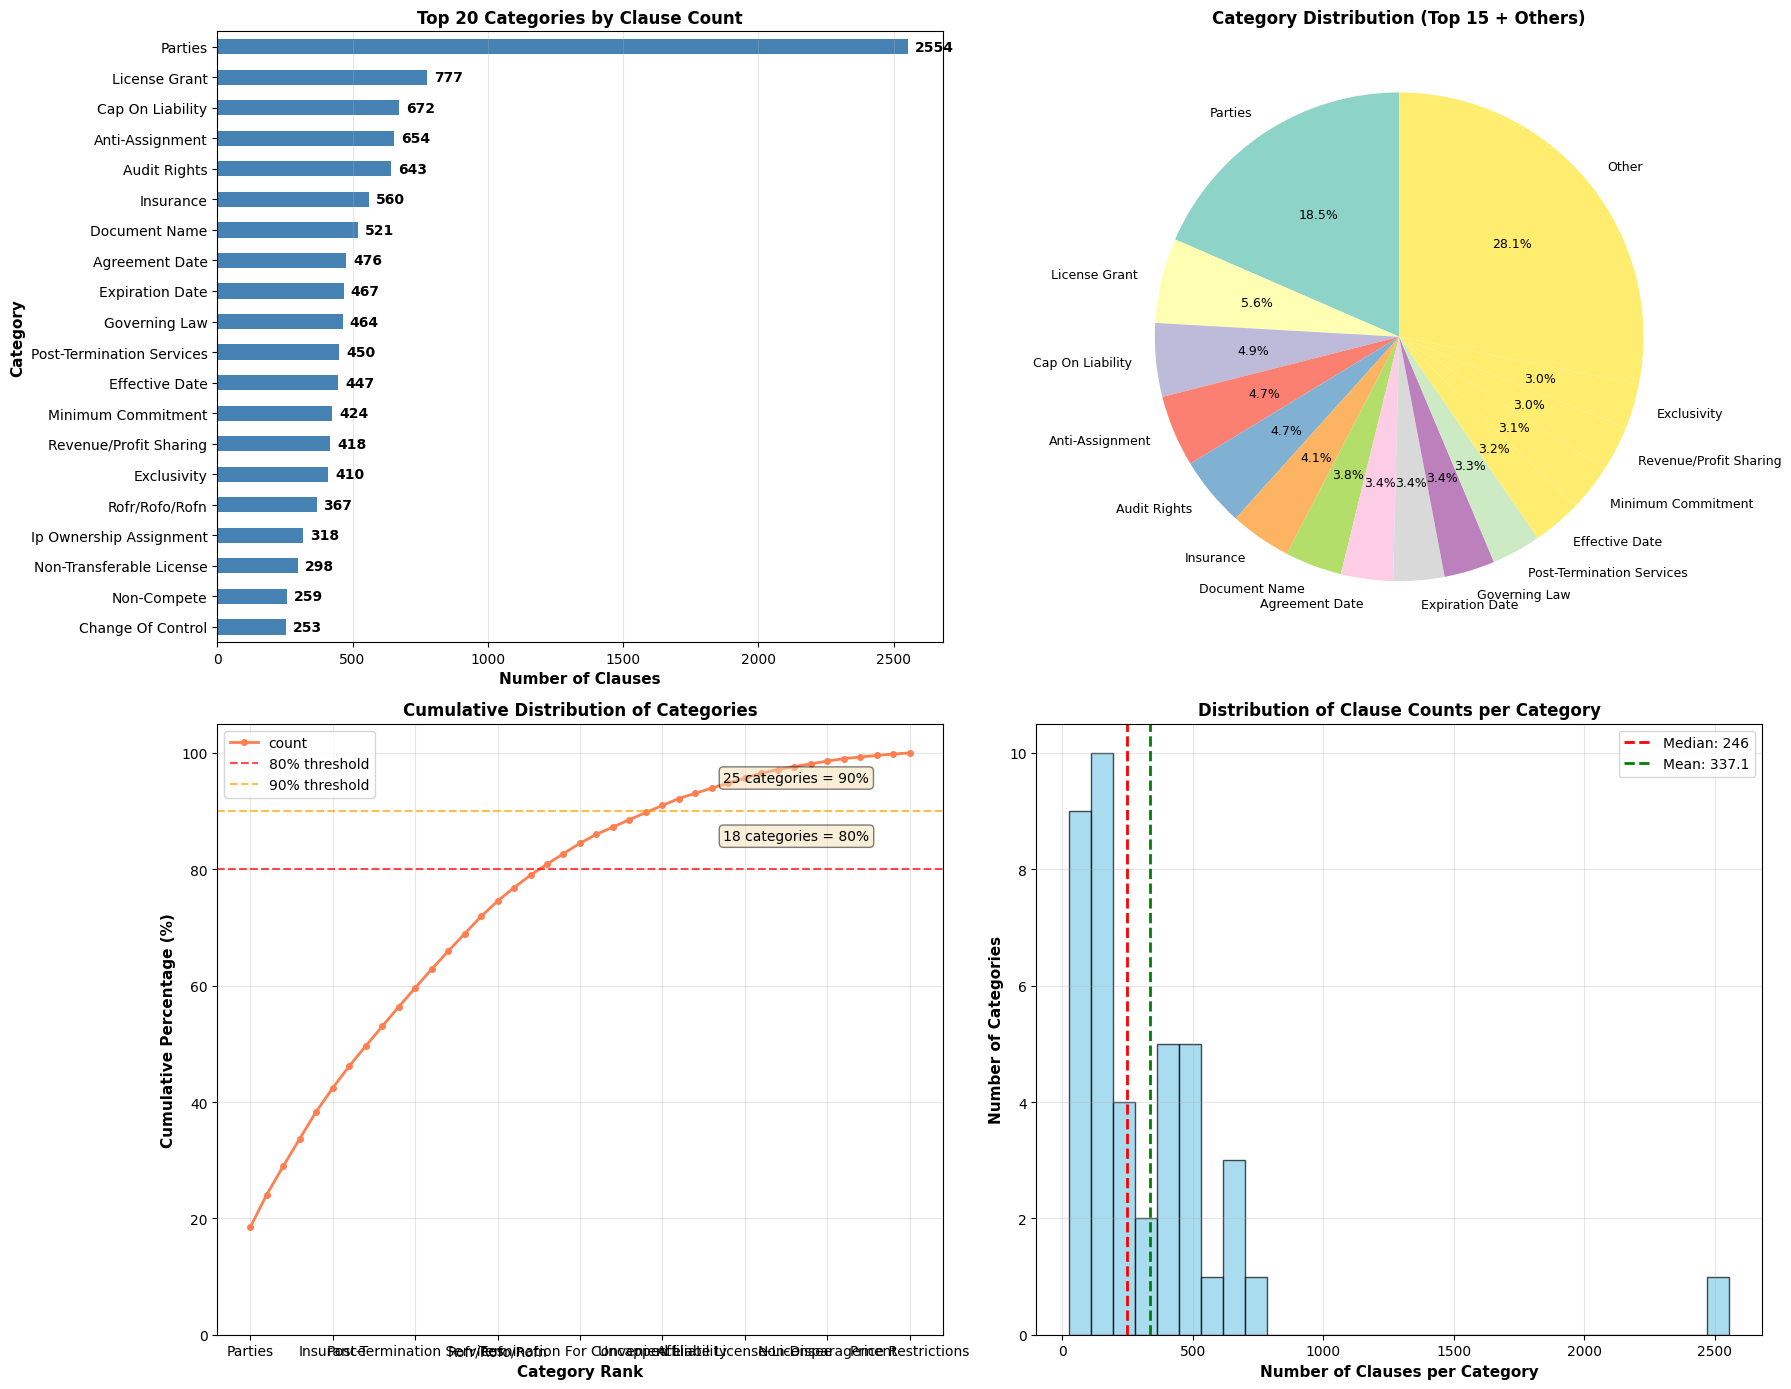

In [4]:
if not clauses_df.empty:
    category_counts = clauses_df['category'].value_counts()
    category_percentages = (clauses_df['category'].value_counts(normalize=True) * 100).round(2)

    
    print("CATEGORY DISTRIBUTION ANALYSIS")
    

    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    ax1 = axes[0, 0]
    top_n = min(20, len(category_counts))
    top_categories = category_counts.head(top_n)
    top_categories.plot(kind='barh', ax=ax1, color='steelblue')
    ax1.set_xlabel('Number of Clauses', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Category', fontsize=11, fontweight='bold')
    ax1.set_title(f'Top {top_n} Categories by Clause Count', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()

    for i, v in enumerate(top_categories.values):
        ax1.text(v + max(top_categories.values) * 0.01, i, str(v), va='center', fontweight='bold')

    ax2 = axes[0, 1]
    top_15_cats = category_counts.head(15)
    other_count = category_counts.iloc[15:].sum() if len(category_counts) > 15 else 0

    if other_count > 0:
        plot_data = pd.concat([top_15_cats, pd.Series({'Other': other_count})])
    else:
        plot_data = top_15_cats

    colors = plt.cm.Set3(range(len(plot_data)))
    plot_data.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                   colors=colors, textprops={'fontsize': 9})
    ax2.set_ylabel('')
    ax2.set_title('Category Distribution (Top 15 + Others)', fontsize=12, fontweight='bold')

    ax3 = axes[1, 0]
    cumsum_pct = (category_counts / category_counts.sum() * 100).cumsum()
    cumsum_pct.plot(kind='line', ax=ax3, marker='o', linewidth=2, markersize=4, color='coral')
    ax3.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% threshold')
    ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
    ax3.set_xlabel('Category Rank', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Cumulative Distribution of Categories', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
    ax3.legend()
    ax3.set_ylim(0, 105)

    cats_80 = (cumsum_pct <= 80).sum()
    cats_90 = (cumsum_pct <= 90).sum()
    ax3.text(len(cumsum_pct) * 0.7, 85, f'{cats_80} categories = 80%',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax3.text(len(cumsum_pct) * 0.7, 95, f'{cats_90} categories = 90%',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax4 = axes[1, 1]
    category_counts.hist(bins=30, ax=ax4, color='skyblue', edgecolor='black', alpha=0.7)
    ax4.axvline(category_counts.median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {category_counts.median():.0f}')
    ax4.axvline(category_counts.mean(), color='green', linestyle='--', linewidth=2,
                label=f'Mean: {category_counts.mean():.1f}')
    ax4.set_xlabel('Number of Clauses per Category', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Number of Categories', fontsize=11, fontweight='bold')
    ax4.set_title('Distribution of Clause Counts per Category', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(project_root / "Visualizations" / "eda_category_distribution.png", bbox_inches='tight', dpi=150)
    plt.show()

    print(f"\nTotal categories: {len(category_counts)}")
    print(f"Total clauses: {category_counts.sum()}")
    print(f"\nCategory Statistics:")
    print(f"  Min clauses per category: {category_counts.min()}")
    print(f"  Max clauses per category: {category_counts.max()}")
    print(f"  Mean clauses per category: {category_counts.mean():.2f}")
    print(f"  Median clauses per category: {category_counts.median():.0f}")
    print(f"  Std dev: {category_counts.std():.2f}")

    print(f"\nTop 10 Categories:")
    for i, (cat, count) in enumerate(category_counts.head(10).items(), 1):
        pct = category_percentages[cat]
        print(f"  {i:2d}. {cat:40s} : {count:5d} clauses ({pct:5.2f}%)")

    print(f"\nBottom 10 Categories (rarest):")
    for i, (cat, count) in enumerate(category_counts.tail(10).items(), 1):
        pct = category_percentages[cat]
        print(f"  {i:2d}. {cat:40s} : {count:5d} clauses ({pct:5.2f}%)")

    
    print("\nCLASS IMBALANCE ANALYSIS")
    
    max_count = category_counts.max()
    min_count = category_counts.min()
    imbalance_ratio = max_count / min_count if min_count > 0 else float('inf')
    print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}:1")

    rare_categories = category_counts[category_counts < 10]
    if len(rare_categories) > 0:
        print(f"\n[WARNING]  {len(rare_categories)} categories have < 10 samples:")
        for cat, count in rare_categories.items():
            print(f"     {cat}: {count} clauses")


### 3.2 Text Length Analysis (Critical for Model Architecture)


TEXT LENGTH ANALYSIS


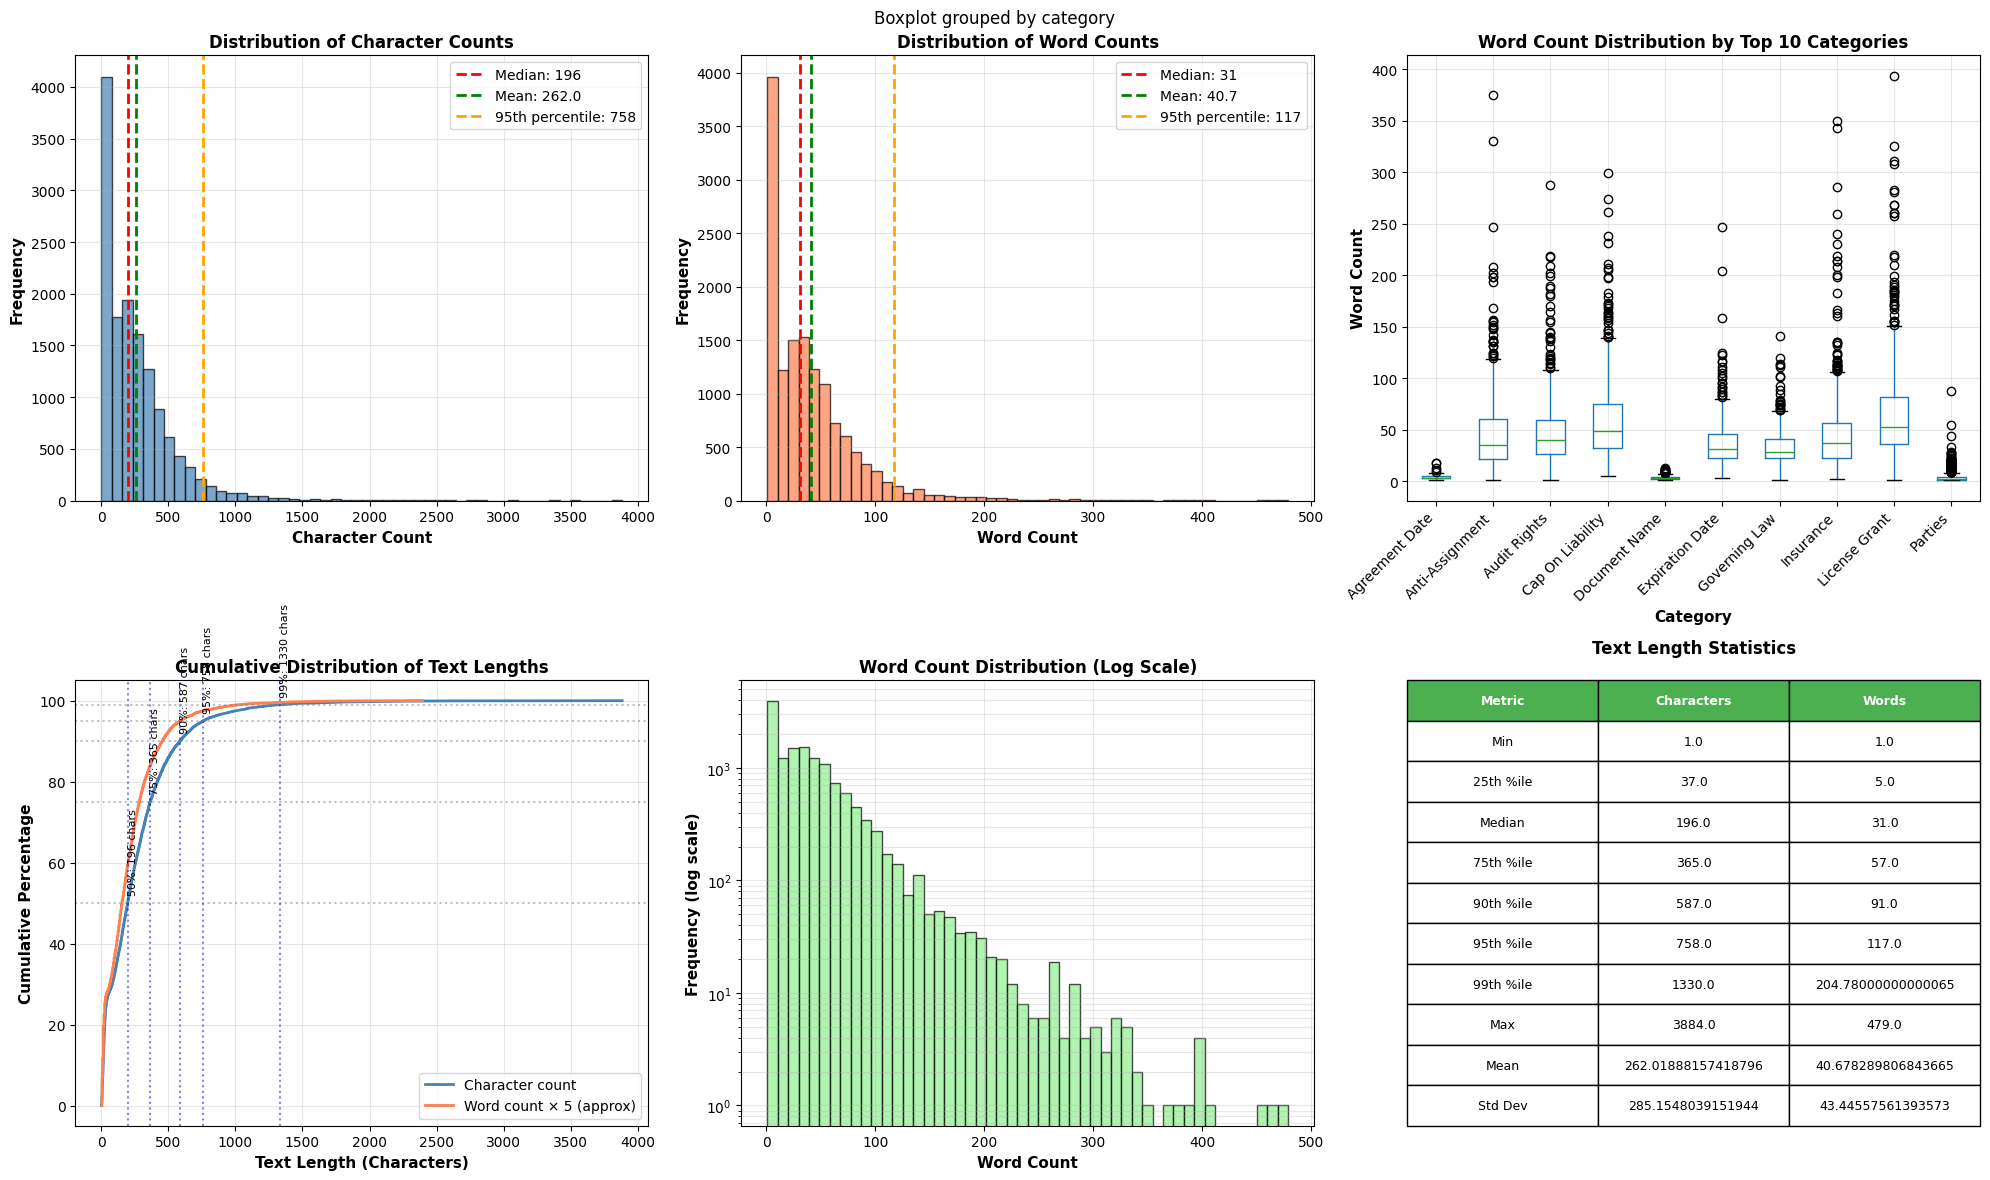


RECOMMENDATIONS FOR MODEL CONFIGURATION

Suggested Max Sequence Lengths:
  Conservative (95th percentile): 117 words / 758 characters
  Comprehensive (99th percentile): 204 words / 1330 characters

  Note: LSTM/Transformer models typically use word/token limits.
        Consider 117-204 tokens for max_sequence_length
  100 tokens: covers 92.4% of clauses
  200 tokens: covers 98.9% of clauses
  300 tokens: covers 99.8% of clauses
  400 tokens: covers 100.0% of clauses
  500 tokens: covers 100.0% of clauses


In [ ]:
if not clauses_df.empty:
    clauses_df['char_count'] = clauses_df['clause_text'].str.len()
    clauses_df['word_count'] = clauses_df['clause_text'].str.split().str.len()

    
    print("TEXT LENGTH ANALYSIS")
    

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    ax1 = axes[0, 0]
    clauses_df['char_count'].hist(bins=50, ax=ax1, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.axvline(clauses_df['char_count'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {clauses_df["char_count"].median():.0f}')
    ax1.axvline(clauses_df['char_count'].mean(), color='green', linestyle='--', linewidth=2,
                label=f'Mean: {clauses_df["char_count"].mean():.1f}')
    ax1.axvline(clauses_df['char_count'].quantile(0.95), color='orange', linestyle='--', linewidth=2,
                label=f'95th percentile: {clauses_df["char_count"].quantile(0.95):.0f}')
    ax1.set_xlabel('Character Count', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax1.set_title('Distribution of Character Counts', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)

    ax2 = axes[0, 1]
    clauses_df['word_count'].hist(bins=50, ax=ax2, color='coral', edgecolor='black', alpha=0.7)
    ax2.axvline(clauses_df['word_count'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {clauses_df["word_count"].median():.0f}')
    ax2.axvline(clauses_df['word_count'].mean(), color='green', linestyle='--', linewidth=2,
                label=f'Mean: {clauses_df["word_count"].mean():.1f}')
    ax2.axvline(clauses_df['word_count'].quantile(0.95), color='orange', linestyle='--', linewidth=2,
                label=f'95th percentile: {clauses_df["word_count"].quantile(0.95):.0f}')
    ax2.set_xlabel('Word Count', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax2.set_title('Distribution of Word Counts', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)

    ax3 = axes[0, 2]
    top_10_cats = category_counts.head(10).index
    df_top10 = clauses_df[clauses_df['category'].isin(top_10_cats)]
    if not df_top10.empty:
        df_top10.boxplot(column='word_count', by='category', ax=ax3, rot=45)
        ax3.set_xlabel('Category', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Word Count', fontsize=11, fontweight='bold')
        ax3.set_title('Word Count Distribution by Top 10 Categories', fontsize=12, fontweight='bold')
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
        ax3.grid(alpha=0.3)

    ax4 = axes[1, 0]
    sorted_char_counts = np.sort(clauses_df['char_count'])
    percentiles = np.arange(1, len(sorted_char_counts) + 1) / len(sorted_char_counts) * 100
    ax4.plot(sorted_char_counts, percentiles, linewidth=2, color='steelblue', label='Character count')

    sorted_word_counts = np.sort(clauses_df['word_count'])
    percentiles = np.arange(1, len(sorted_word_counts) + 1) / len(sorted_word_counts) * 100
    ax4.plot(sorted_word_counts * 5, percentiles, linewidth=2, color='coral', label='Word count × 5 (approx)')

    for pct in [50, 75, 90, 95, 99]:
        char_val = np.percentile(clauses_df['char_count'], pct)
        word_val = np.percentile(clauses_df['word_count'], pct)
        ax4.axvline(char_val, color='blue', linestyle=':', alpha=0.5)
        ax4.axhline(pct, color='gray', linestyle=':', alpha=0.5)
        ax4.text(char_val, pct + 2, f'{pct}%: {char_val:.0f} chars',
                fontsize=8, rotation=90, va='bottom')

    ax4.set_xlabel('Text Length (Characters)', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Cumulative Percentage', fontsize=11, fontweight='bold')
    ax4.set_title('Cumulative Distribution of Text Lengths', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(alpha=0.3)

    ax5 = axes[1, 1]
    word_counts_pos = clauses_df[clauses_df['word_count'] > 0]['word_count']
    ax5.hist(word_counts_pos, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    ax5.set_yscale('log')
    ax5.set_xlabel('Word Count', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Frequency (log scale)', fontsize=11, fontweight='bold')
    ax5.set_title('Word Count Distribution (Log Scale)', fontsize=12, fontweight='bold')
    ax5.grid(alpha=0.3, which='both')

    ax6 = axes[1, 2]
    ax6.axis('off')

    stats_data = {
        'Metric': ['Min', '25th %ile', 'Median', '75th %ile', '90th %ile', '95th %ile', '99th %ile', 'Max', 'Mean', 'Std Dev'],
        'Characters': [
            clauses_df['char_count'].min(),
            clauses_df['char_count'].quantile(0.25),
            clauses_df['char_count'].median(),
            clauses_df['char_count'].quantile(0.75),
            clauses_df['char_count'].quantile(0.90),
            clauses_df['char_count'].quantile(0.95),
            clauses_df['char_count'].quantile(0.99),
            clauses_df['char_count'].max(),
            clauses_df['char_count'].mean(),
            clauses_df['char_count'].std()
        ],
        'Words': [
            clauses_df['word_count'].min(),
            clauses_df['word_count'].quantile(0.25),
            clauses_df['word_count'].median(),
            clauses_df['word_count'].quantile(0.75),
            clauses_df['word_count'].quantile(0.90),
            clauses_df['word_count'].quantile(0.95),
            clauses_df['word_count'].quantile(0.99),
            clauses_df['word_count'].max(),
            clauses_df['word_count'].mean(),
            clauses_df['word_count'].std()
        ]
    }
    stats_df = pd.DataFrame(stats_data)

    table = ax6.table(cellText=stats_df.values, colLabels=stats_df.columns,
                     cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    ax6.set_title('Text Length Statistics', fontsize=12, fontweight='bold', pad=20)

    for i in range(len(stats_df.columns)):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')

    plt.tight_layout()
    plt.savefig(project_root / "Visualizations" / "eda_text_length_stats.png", bbox_inches='tight', dpi=150)
    plt.show()

    
    print("\nRECOMMENDATIONS FOR MODEL CONFIGURATION")
    

    p95_chars = clauses_df['char_count'].quantile(0.95)
    p99_chars = clauses_df['char_count'].quantile(0.99)
    p95_words = clauses_df['word_count'].quantile(0.95)
    p99_words = clauses_df['word_count'].quantile(0.99)

    print(f"\nSuggested Max Sequence Lengths:")
    print(f"  Conservative (95th percentile): {int(p95_words)} words / {int(p95_chars)} characters")
    print(f"  Comprehensive (99th percentile): {int(p99_words)} words / {int(p99_chars)} characters")
    print(f"\n  Note: LSTM/Transformer models typically use word/token limits.")
    print(f"        Consider {int(p95_words)}-{int(p99_words)} tokens for max_sequence_length")

    for threshold in [100, 200, 300, 400, 500]:
        pct_covered = (clauses_df['word_count'] <= threshold).sum() / len(clauses_df) * 100
        print(f"  {threshold} tokens: covers {pct_covered:.1f}% of clauses")


### 3.3 Clauses per Contract & Category-Specific Analysis


CLAUSES PER CONTRACT & CATEGORY ANALYSIS


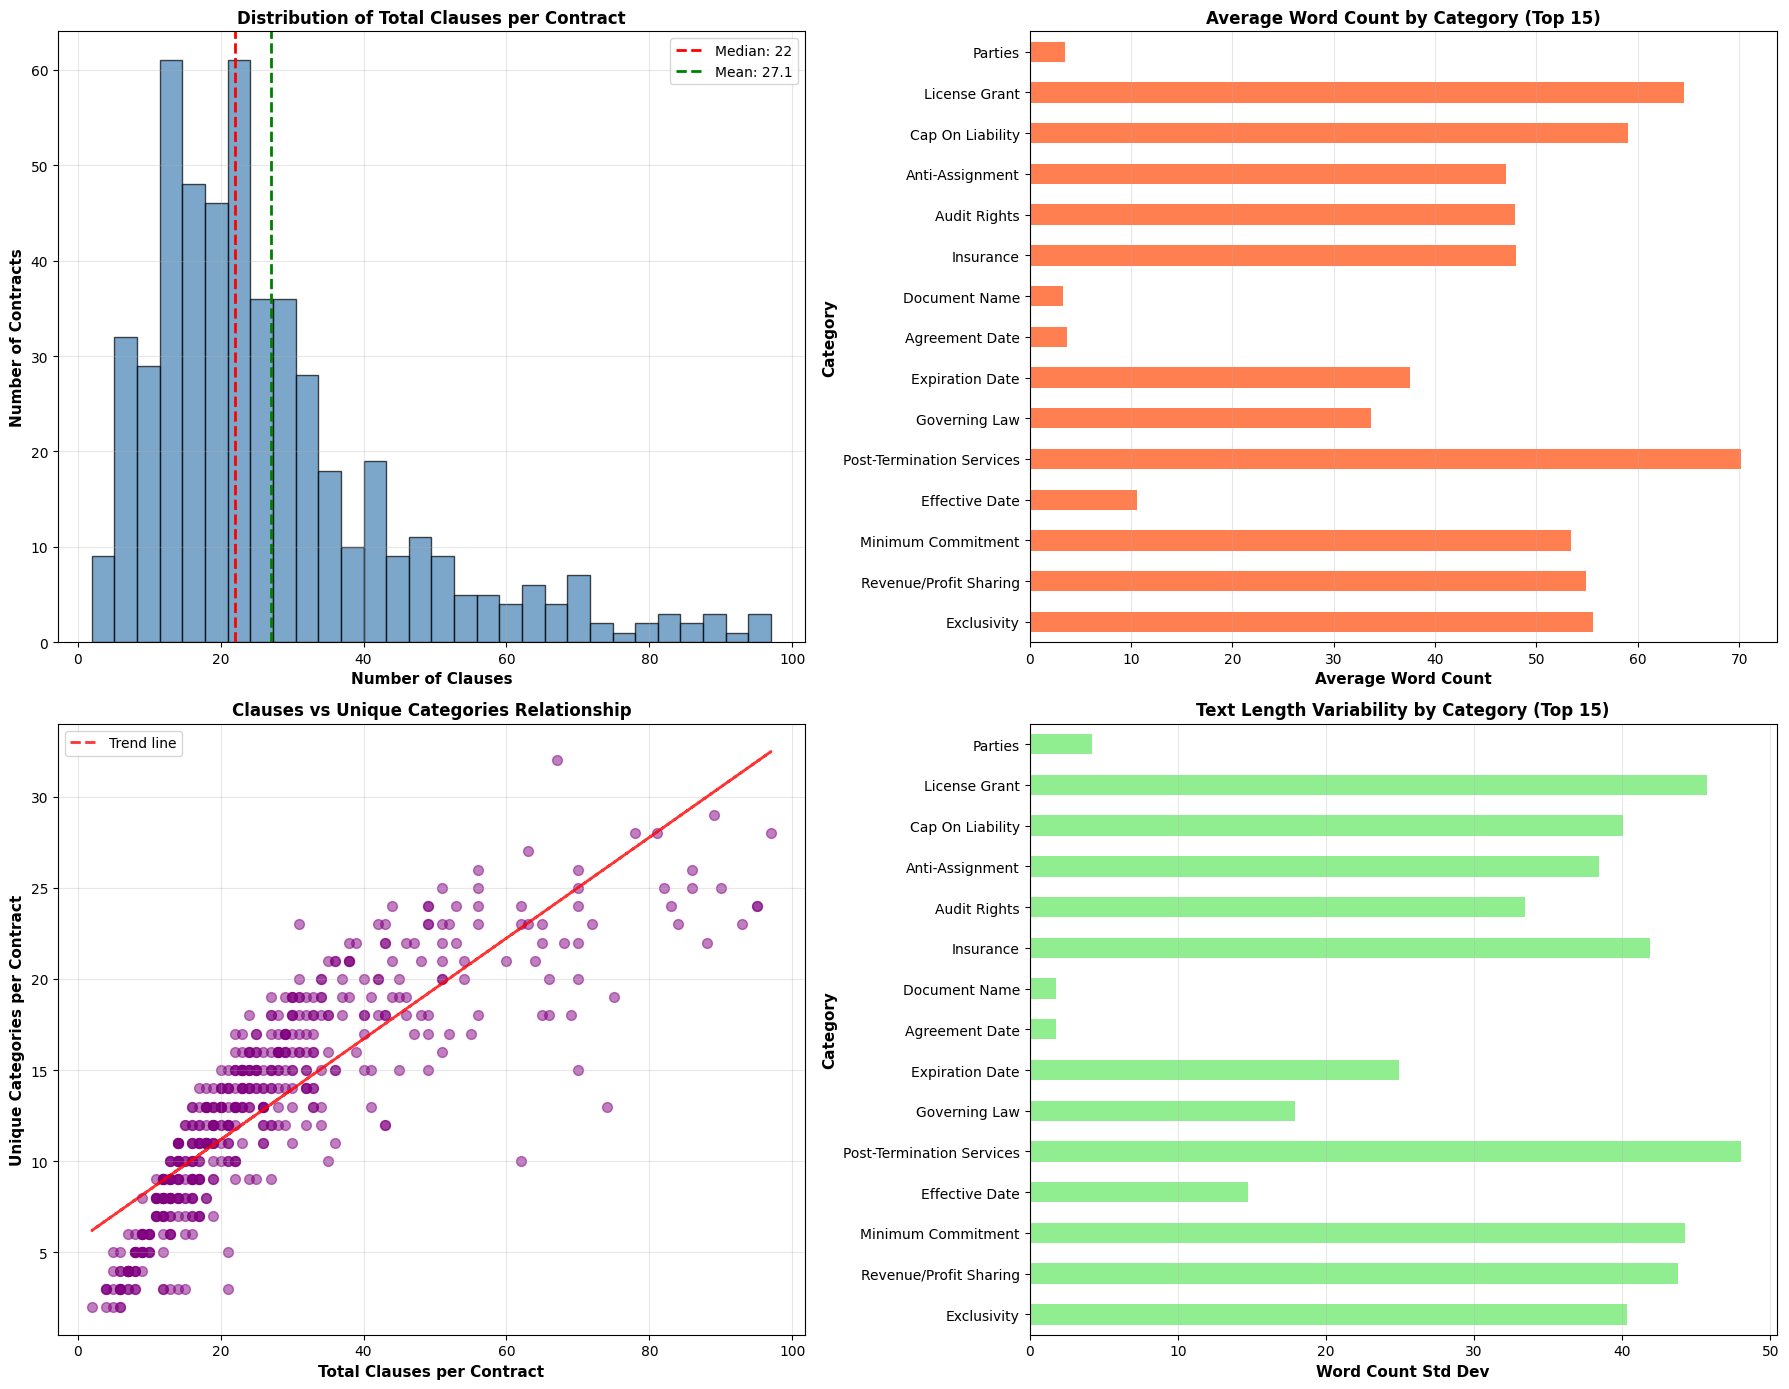


Contract Statistics:
  Total contracts: 510
  Average clauses per contract: 27.10
  Median clauses per contract: 22
  Average unique categories per contract: 13.14

Category Text Characteristics (Top 5 longest & shortest):

Longest average text:
  1. Affiliate License-Licensor                         - 95.3 ± 67.5 words (69 samples)
  2. Affiliate License-Licensee                         - 85.1 ± 55.5 words (115 samples)
  3. Irrevocable Or Perpetual License                   - 83.0 ± 57.9 words (165 samples)
  4. Most Favored Nation                                - 72.4 ± 40.2 words (38 samples)
  5. Uncapped Liability                                 - 70.8 ± 39.3 words (167 samples)

Shortest average text:
  1. Document Name                                      - 3.3 ± 1.8 words (521 samples)
  2. Parties                                            - 3.4 ± 4.2 words (2554 samples)
  3. Agreement Date                                     - 3.7 ± 1.8 words (476 samples)
  4. Effective D

In [ ]:
if not clauses_df.empty:
    
    print("CLAUSES PER CONTRACT & CATEGORY ANALYSIS")
    

    clauses_per_contract = clauses_df.groupby('contract_id').agg({
        'clause_text': 'count',
        'category': 'nunique'
    }).rename(columns={'clause_text': 'total_clauses', 'category': 'unique_categories'})

    category_stats = clauses_df.groupby('category').agg({
        'word_count': ['mean', 'median', 'std', 'min', 'max'],
        'char_count': ['mean', 'median'],
        'clause_text': 'count'
    }).round(2)

    category_stats.columns = ['_'.join(col).strip() if isinstance(col, tuple) and col[1] else str(col[0]) if isinstance(col, tuple) else str(col)
                              for col in category_stats.columns.values]

    count_col = [col for col in category_stats.columns if 'clause_text' in col or col == 'count']
    if count_col:
        count_col_name = count_col[0]
        category_stats = category_stats.rename(columns={count_col_name: 'clause_text_count'})
        category_stats = category_stats.sort_values('clause_text_count', ascending=False)
    else:
        category_stats = category_stats.sort_values(category_stats.columns[0], ascending=False)
    top_15_cats = category_stats.head(15).index

    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    ax1 = axes[0, 0]
    clauses_per_contract['total_clauses'].hist(bins=30, ax=ax1, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.axvline(clauses_per_contract['total_clauses'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {clauses_per_contract["total_clauses"].median():.0f}')
    ax1.axvline(clauses_per_contract['total_clauses'].mean(), color='green', linestyle='--', linewidth=2,
                label=f'Mean: {clauses_per_contract["total_clauses"].mean():.1f}')
    ax1.set_xlabel('Number of Clauses', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Number of Contracts', fontsize=11, fontweight='bold')
    ax1.set_title('Distribution of Total Clauses per Contract', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)

    ax2 = axes[0, 1]
    category_stats.loc[top_15_cats, 'word_count_mean'].plot(kind='barh', ax=ax2, color='coral')
    ax2.set_xlabel('Average Word Count', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Category', fontsize=11, fontweight='bold')
    ax2.set_title('Average Word Count by Category (Top 15)', fontsize=12, fontweight='bold')
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)

    ax3 = axes[1, 0]
    ax3.scatter(clauses_per_contract['total_clauses'], clauses_per_contract['unique_categories'],
               alpha=0.5, s=50, color='purple')
    ax3.set_xlabel('Total Clauses per Contract', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Unique Categories per Contract', fontsize=11, fontweight='bold')
    ax3.set_title('Clauses vs Unique Categories Relationship', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)

    z = np.polyfit(clauses_per_contract['total_clauses'], clauses_per_contract['unique_categories'], 1)
    p = np.poly1d(z)
    ax3.plot(clauses_per_contract['total_clauses'], p(clauses_per_contract['total_clauses']),
            "r--", alpha=0.8, linewidth=2, label=f'Trend line')
    ax3.legend()

    ax4 = axes[1, 1]
    category_stats.loc[top_15_cats, 'word_count_std'].plot(kind='barh', ax=ax4, color='lightgreen')
    ax4.set_xlabel('Word Count Std Dev', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Category', fontsize=11, fontweight='bold')
    ax4.set_title('Text Length Variability by Category (Top 15)', fontsize=12, fontweight='bold')
    ax4.invert_yaxis()
    ax4.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig(project_root / "Visualizations" / "eda_clauses_per_contract.png", bbox_inches='tight', dpi=150)
    plt.show()

    print(f"\nContract Statistics:")
    print(f"  Total contracts: {len(clauses_per_contract)}")
    print(f"  Average clauses per contract: {clauses_per_contract['total_clauses'].mean():.2f}")
    print(f"  Median clauses per contract: {clauses_per_contract['total_clauses'].median():.0f}")
    print(f"  Average unique categories per contract: {clauses_per_contract['unique_categories'].mean():.2f}")

    print(f"\nCategory Text Characteristics (Top 5 longest & shortest):")
    print("\nLongest average text:")
    longest = category_stats.nlargest(5, 'word_count_mean')[['word_count_mean', 'word_count_std', 'clause_text_count']]
    for idx, (cat, row) in enumerate(longest.iterrows(), 1):
        print(f"  {idx}. {cat[:50]:50s} - {row['word_count_mean']:.1f} ± {row['word_count_std']:.1f} words ({int(row['clause_text_count'])} samples)")

    print("\nShortest average text:")
    shortest = category_stats.nsmallest(5, 'word_count_mean')[['word_count_mean', 'word_count_std', 'clause_text_count']]
    for idx, (cat, row) in enumerate(shortest.iterrows(), 1):
        print(f"  {idx}. {cat[:50]:50s} - {row['word_count_mean']:.1f} ± {row['word_count_std']:.1f} words ({int(row['clause_text_count'])} samples)")


### 3.4 Sample Clauses & Data Quality Checks


In [ ]:
if not clauses_df.empty:
    
    print("SAMPLE CLAUSES & DATA QUALITY CHECKS")
    

    top_10_categories = category_counts.head(10).index

      
    print("\nSAMPLE CLAUSES BY CATEGORY (Top 10)")
    

    for i, category in enumerate(top_10_categories, 1):
        print(f"\n{i}. CATEGORY: {category}")
        

        cat_clauses = clauses_df[clauses_df['category'] == category]
        print(f"   \nTotal clauses: {len(cat_clauses)}")
        print(f"   \nAvg word count: {cat_clauses['word_count'].mean():.1f} words")

        samples = cat_clauses.sample(min(2, len(cat_clauses)))
        for j, (idx, row) in enumerate(samples.iterrows(), 1):
            print(f"\n   Sample {j} ({row['word_count']} words):")
            text_preview = row['clause_text'][:250] + "..." if len(row['clause_text']) > 250 else row['clause_text']
            print(f"   {text_preview}")

      
    print("\nDATA QUALITY CHECKS")
    

    empty_clauses = clauses_df[clauses_df['clause_text'].str.strip() == '']
    very_short = clauses_df[clauses_df['word_count'] < 3]

    print(f"\n[OK] Empty clauses: {len(empty_clauses)}")
    print(f"[OK] Very short clauses (< 3 words): {len(very_short)} ({len(very_short)/len(clauses_df)*100:.2f}%)")

    duplicate_clauses = clauses_df.duplicated(subset=['clause_text'], keep=False)
    print(f"[OK] Duplicate clause texts: {duplicate_clauses.sum()} ({duplicate_clauses.sum()/len(clauses_df)*100:.2f}%)")

    p99_words = clauses_df['word_count'].quantile(0.99)
    very_long = clauses_df[clauses_df['word_count'] > p99_words]
    print(f"[OK] Very long clauses (> 99th percentile, > {p99_words:.0f} words): {len(very_long)}")

    
    print("\nEDA SUMMARY & RECOMMENDATIONS")
    
    print(f"""
[OK] Dataset Overview:
   - Total clauses: {len(clauses_df):,}
   - Unique categories: {clauses_df['category'].nunique()}
   - Unique contracts: {clauses_df['contract_id'].nunique()}
   - Average clause length: {clauses_df['word_count'].mean():.1f} words
   - Median clause length: {clauses_df['word_count'].median():.0f} words

 Key Findings for Model Design:
   1. Class Imbalance: Imbalance ratio of {category_counts.max()/category_counts.min():.1f}:1
      -> Consider class weights or stratified sampling

   2. Text Length: 95th percentile = {int(clauses_df['word_count'].quantile(0.95))} words
      -> Recommended max_sequence_length: {int(clauses_df['word_count'].quantile(0.95))}-{int(clauses_df['word_count'].quantile(0.99))} tokens

   3. Rare Categories: {len(category_counts[category_counts < 10])} categories have < 10 samples
      -> Consider combining rare categories or using data augmentation

   4. Text Variability: High std dev in word counts across categories
      -> Padding/truncation strategy needed for LSTM model

 Next Steps:
   - Preprocessing: Text cleaning, lowercasing, tokenization
   - Train/Test Split: Stratified split to maintain category distribution
   - Model 1 (Feedforward): TF-IDF features with max_features based on vocab size
   - Model 2 (LSTM): Sequence padding to {int(clauses_df['word_count'].quantile(0.95))} tokens
   - Evaluation: Focus on macro F1-score due to class imbalance
""")


SAMPLE CLAUSES & DATA QUALITY CHECKS

SAMPLE CLAUSES BY CATEGORY (Top 10)

1. CATEGORY: Parties
   
Total clauses: 2554
   
Avg word count: 3.4 words

   Sample 1 (3 words):
   Revolution Medicines, Inc.

   Sample 2 (2 words):
   Sanofi Pasteur

2. CATEGORY: License Grant
   
Total clauses: 777
   
Avg word count: 64.5 words

   Sample 1 (50 words):
   or expiration of this Agreement) a non-exclusive, fully-paid, irrevocable license (including the right to grant sublicenses) under all Intellectual Property Rights and Know-How Controlled by Licensee and embodied within, or claiming or covering the L...

   Sample 2 (84 words):
   If, following the Test, we determine that we will approve the tested item, then for so long as we deem that item to be an "approved item" under this Agreement, you will have the right to use that item under the terms of this Agreement; and we will ha...

3. CATEGORY: Cap On Liability
   
Total clauses: 672
   
Avg word count: 59.0 words

   Sample 1 (13 words)